## Q.1 Create a synthetic dataset for the credit default problem. You may choose priors suitably. Generate 10^4 points from your model. Using the generated dataset evaluate a) Bayes Classifier and b) Classifier which has a randomization built in. 

### a) Bayes Classifier evaluated on Synthetic Dataset

In [ ]:
# Importing libraries and important modules
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

We assume `N=10000` Data points and the Prior probabilities `p0=P(Y=0)=0.8` and `p1=P(Y=1)=0.2` for our Bayes Classifier where
 - `Y=1` denotes a credit default 
 - `Y=0` denotes no credit default.

In [ ]:
# Setting number of data points and Prior probabilities
N=10000 
p0=0.8 
p1=0.2

In [ ]:
# Defining Probability Density for Normal Distribution function for given value of x, Mean and Standard Deviation
def normal_distrib(x,Mean,Sd): 
    k = math.sqrt( 1/(2*np.pi*Sd*Sd))
    prob_density = k * np.exp(-0.5*((x-Mean)/Sd)**2)
    return prob_density

In [ ]:
# Defining a Normal Distribution function f0(x) with Mean=-1 and Standard Deviation=1
def f0(x):
    return normal_distrib(x,-1,1)

In [ ]:
# Defining a Normal Distribution function f1(x) with Mean=1 and Standard Deviation=1
def f1(x):
    return normal_distrib(x,1,1)

In [ ]:
# List to store generated Data Points.
data=[]                         
for i in range(N):

   # Performing a Single Random Binomial Trial with probability p1
    Yc=np.random.binomial(1,p1,1)[0] 
    
    if(Yc==0):
        # Choosing 1 sample from Normal distribution with Mean= -1, Standard Deviation=1
        Xc = np.random.normal(-1,1,1)
    else:
        # Choosing 1 sample from Normal distribution with Mean= 1, Standard Deviation=1
        Xc = np.random.normal(1,1,1)
   
    # Adding the generated Data Point to our Dataset (Feature+Output)
    data.append([Xc,Yc])

In [ ]:
# Defining the Bayes Classifier
def bayes_classifier(xi):

    # Calculating the Posteriors q0(x), q1(x) on a data point xi
    q0=(p0*f0(xi))/(p0*f0(xi)+p1*f1(xi))  
    q1=(p1*f1(xi))/(p0*f0(xi)+p1*f1(xi))

    # If q1(x)>=q0(x), the hypothesis predicts a value 1 otherwise 0
    if ( q1 >= q0 ):                          
        return 1
    else:
        return 0

In [ ]:
# Lists to store predicted output values and observed values.
pred_a = []
obs_a = [] 
for i in range(N):
    pred_a.append(bayes_classifier(data[i][0])) 
    obs_a.append(data[i][1])                    

In [ ]:
# Generating the Confusion Matrix and Classification Report for Bayes Classifier.
confMatrix_a = confusion_matrix(pred_a, obs_a)
report_a = classification_report(pred_a, obs_a)

In [ ]:
print(confMatrix_a)

[[7645  751]
 [ 360 1244]]


In [ ]:
print(report_a)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      8396
           1       0.62      0.78      0.69      1604

    accuracy                           0.89     10000
   macro avg       0.79      0.84      0.81     10000
weighted avg       0.90      0.89      0.89     10000



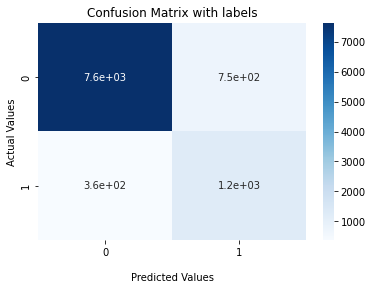

In [ ]:
# Seaborn Heatmap of the Confusion Matrix
ax = sns.heatmap(confMatrix_a, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

# To Display the visualization of the Confusion Matrix.
plt.show() 

In [ ]:
print("Accuracy of Bayes Classifier on the synthetic Dataset(%):",metrics.accuracy_score(pred_a, obs_a)*100, "%")

Accuracy of Bayes Classifier on the synthetic Dataset(%): 88.89 %


### b) Classifier with Randomization built in evaluated on Synthetic Dataset

In [ ]:
# Defining the Classifier with Randomization built in
def classifier_random():
    
    # Random Variable(z) as a single Binomial Trial with p1 probability that z=1
    z = np.random.binomial(1,p1,1)[0]

    # If z=0, return 0; if z=1, return 1 as the predicted output
    return z                           

In [ ]:
# Lists to store predicted output values and observed values.
pred_b=[] 
obs_b=[] 
for i in range(N):
    pred_b.append(classifier_random())       
    obs_b.append(data[i][1])                    

In [ ]:
# Generating the Confusion Matrix and Classification Report for Classifier with Randomization built in
confMatrix_b=confusion_matrix(pred_b, obs_b)
report_b=classification_report(pred_b, obs_b)

In [ ]:
print(confMatrix_b)

[[6475 1582]
 [1530  413]]


In [ ]:
print(report_b)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      8057
           1       0.21      0.21      0.21      1943

    accuracy                           0.69     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.69      0.69      0.69     10000



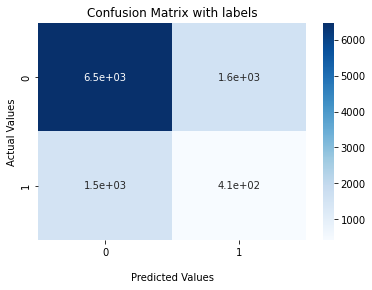

In [ ]:
# Seaborn Heatmap of the Confusion Matrix
ax = sns.heatmap(confMatrix_b, annot=True, cmap='Blues') 
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

# To Display the visualization of the Confusion Matrix.
plt.show() 

In [ ]:
print("Accuracy of Classifier with Randomization built in on the synthetic Dataset(%):",metrics.accuracy_score(pred_b, obs_b)*100, "%")

Accuracy of Classifier with Randomization built in on the synthetic Dataset(%): 68.88 %


**Observations:**

1. The Bayes Classifier built by comparing the posterior probabilities q0(x) and q1(x) produces an accuracy of close to **88.89%** on the synthetic dataset. where,
 * Posteriors q0(x), q1(x):
    * q0(x) = p0f0(x)/(p0f0(x)+p1f1(x))
    * q1(x) = p1f1(x)/(p0f0(x)+p1f1(x))
  * Bayes Classifier H( x ):
    * H( x ) = 1, when q1( x ) >= q0( x )
    * H( x ) = 0, when q1( x ) < q0( x )
2. The Classifier with Randomization built in produces an accuracy of close to **68.88%** on the synthetic dataset. It utilizes the probability of a Random Variable z taking a value 0 or 1 to decide the outcome of the hypothesis. where,
 *   priors P( z ):
        * P(z = 0) = 0.8
        * P(z = 1) = 0.2
 *   Hb(x, z): 
          * Hb(x, 0) = 0, when z = 0
          * Hb(x, 1) = 1, when z = 1 
3. We observe that the Classifier with Randomization built in has a lower accuracy that the Bayes Classifier. This shows that including more Randomness in the hypothesis function to predict the outcome doesn't guarantee an accurate prediction and is not useful.

4. The Bayes classifier has a higher accuracy and depicts that a deterministic hypothesis function is better for predicting an accurate outcome. Hence, it can be used to make real-time predictions.

5. The Confusion Matrices for both the classifiers shows the number of True positives, True negatives, False positives & False negatives predicted by our model. We observe that among the values predicted accurately, the no. of non-defaulters is larger than defaulters which is in accordance to our assumed prior probabilities.



*The End*

---


